# 14.32 PS1 Max Ghenis

## Problem 4

(This is a Python Jupyter notebook.)

>Draw 500 random samples each with a sample size of 8 from a random number generator for a
standard Normal distribution. Then increase the sample size to 32. Finally, increase the sample
size to 128. Plot histograms of the sampling distributions of (i) the sample mean and (ii) the
sample variance, for each of these three sample sizes. Now repeat your experiments (and plots)
for three samples drawn from another parametric distribution of your choice (e.g., a uniform
distribution).

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def sample_normal(size):
    v = np.random.normal(size=size)
    return v.mean(), v.var()

def sample_uniform(size):
    v = np.random.uniform(size=size)
    return v.mean(), v.var()

In [0]:
def stat_df(size, sims, dist):
    if dist == 'normal':
        df = pd.DataFrame([sample_normal(size) for i in range(sims)])
    else:
        df = pd.DataFrame([sample_uniform(size) for i in range(sims)])
    df.columns = ['mean', 'var']
    df['sample_size'] = size
    df['dist'] = dist
    return df

In [0]:
combined = pd.concat([stat_df(8, 500, 'normal'),
                      stat_df(32, 500, 'normal'),
                      stat_df(128, 500, 'normal'),
                      stat_df(8, 500, 'uniform'),
                      stat_df(32, 500, 'uniform'),
                      stat_df(128, 500, 'uniform')])

normal mean 8


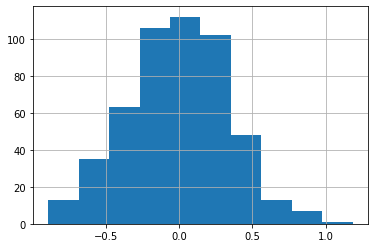

normal mean 32


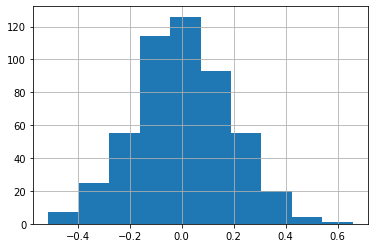

normal mean 128


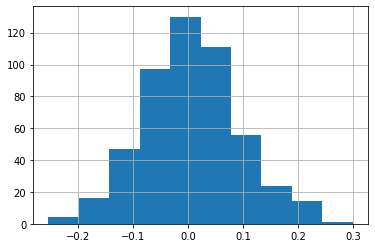

normal var 8


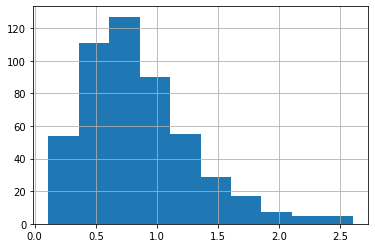

normal var 32


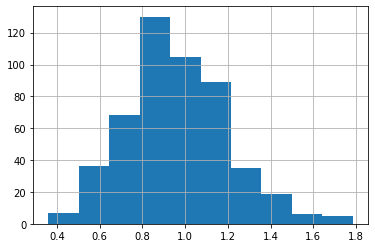

normal var 128


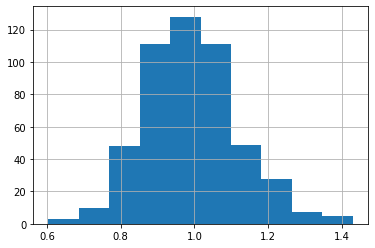

uniform mean 8


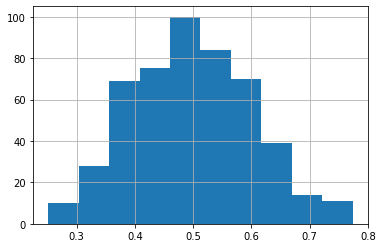

uniform mean 32


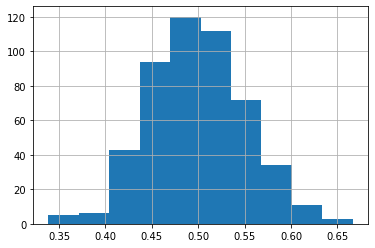

uniform mean 128


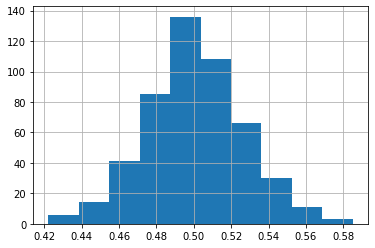

uniform var 8


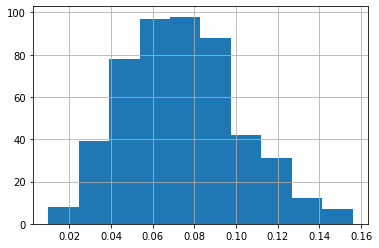

uniform var 32


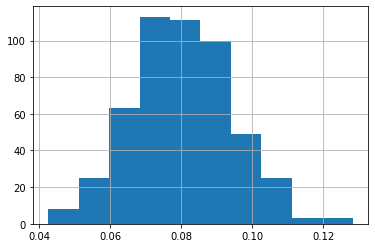

uniform var 128


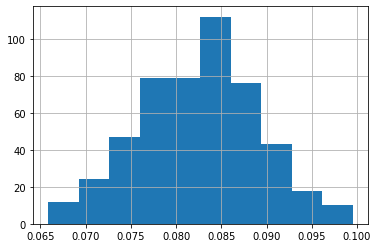

In [5]:
for dist in ['normal', 'uniform']:
    for feature in ['mean', 'var']:
        for sample_size in [8, 32, 128]:
            print(dist + ' ' + feature + ' ' + str(sample_size))
            combined[(combined.dist == dist) &
                     (combined.sample_size == sample_size)][feature].hist()
            plt.show()

>Discuss the results of your experiment in light of the central limit theorem.

**As the sample size grows, the sample means are tighter around the true means, and the sample variances shrink.**

### b

>Your experiments produce “samples of sample means.” Compute the mean and variance of the
sample means generated by each experiment and compare them to the mean and variance predicted
by statistical theory.

In [6]:
combined.groupby(['dist', 'sample_size'])['mean'].mean()

dist     sample_size
normal   8             -0.011601
         32             0.002284
         128            0.006773
uniform  8              0.498243
         32             0.499221
         128            0.500549
Name: mean, dtype: float64

In [7]:
combined.groupby(['dist', 'sample_size'])['mean'].var()

dist     sample_size
normal   8              0.119668
         32             0.033178
         128            0.007581
uniform  8              0.010520
         32             0.002756
         128            0.000687
Name: mean, dtype: float64

>Does the variance of the sample means (i.e., the sampling variance) decrease with sample size at the rate predicted by the theory? Does Normality seem to matter for this?

**Yes, variance of the sample means decreases with sample size as predicted, for both normal and uniform distributions.**